In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms.functional as fn
from torchvision.utils import make_grid
from PIL import Image
import matplotlib.pyplot as plt

tensor([[[0.4235, 0.4510, 0.4000,  ..., 0.0353, 0.0039, 0.0000],
         [0.4039, 0.4118, 0.3804,  ..., 0.0118, 0.0039, 0.0039],
         [0.4353, 0.4196, 0.4039,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.1137, 0.1176, 0.1294,  ..., 0.2980, 0.2941, 0.2902],
         [0.0863, 0.0941, 0.1137,  ..., 0.3098, 0.3137, 0.3137],
         [0.0941, 0.0863, 0.1020,  ..., 0.3020, 0.3137, 0.3176]],

        [[0.4980, 0.5255, 0.4706,  ..., 0.0431, 0.0118, 0.0039],
         [0.4745, 0.4824, 0.4510,  ..., 0.0196, 0.0118, 0.0118],
         [0.4980, 0.4824, 0.4745,  ..., 0.0078, 0.0039, 0.0039],
         ...,
         [0.1608, 0.1765, 0.1882,  ..., 0.2784, 0.2745, 0.2706],
         [0.1333, 0.1412, 0.1608,  ..., 0.2902, 0.2941, 0.2941],
         [0.1412, 0.1333, 0.1529,  ..., 0.2745, 0.2863, 0.2902]],

        [[0.3216, 0.3490, 0.3059,  ..., 0.0314, 0.0000, 0.0000],
         [0.3098, 0.3176, 0.2863,  ..., 0.0000, 0.0000, 0.0000],
         [0.3451, 0.3294, 0.3176,  ..., 0.0000, 0.0000, 0.

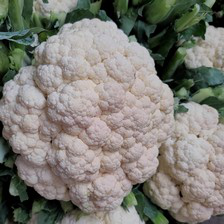

In [2]:
img = Image.open("data/Vegetable Images/train/Cauliflower/0001.jpg")
img_tensor = fn.to_tensor(img)
print(img_tensor)
print(f"Mean: {img_tensor.mean()}\nStd: {img_tensor.std()}")
img

In [3]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
                [0.5, 0.5, 0.5], 
                [0.5, 0.5, 0.5]
        )
])

In [4]:
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.5, 0.5, 0.5], 
        [0.5, 0.5, 0.5]
    )
])

In [5]:
train_set = ImageFolder('data/Vegetable Images/train', transform=train_transform)
val_set = ImageFolder('data/Vegetable Images/validation', transform=train_transform)
test_set = ImageFolder('data/Vegetable Images/test', transform=train_transform)

In [6]:
print(len(train_set.samples), len(val_set.samples), len(test_set.samples))

15000 3000 3000


In [7]:
print(train_set.classes)
print(len(train_set.classes))

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


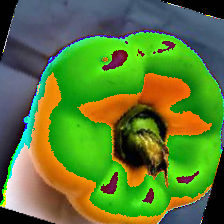

In [8]:
dataloader = DataLoader(train_set, batch_size=32, shuffle=True)
images, labels = next(iter(dataloader))
fn.to_pil_image(images[0])

In [9]:
print(labels)

tensor([ 6,  1,  0,  6, 10,  6, 10,  6, 11,  3, 13, 12,  5,  1,  2,  6,  0,  1,
         1,  6, 14, 14,  0, 14, 10, 11,  3,  6,  7, 11,  9, 10])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


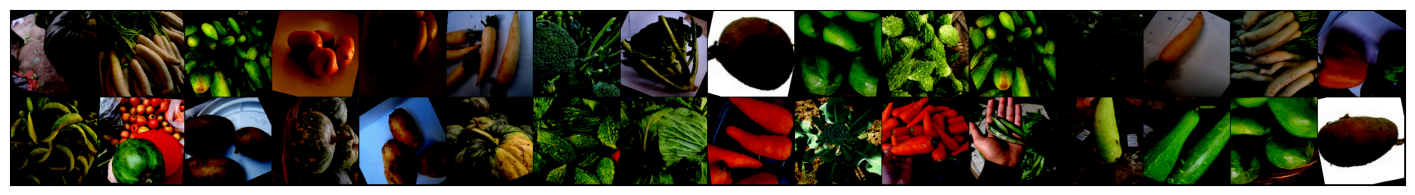

In [10]:
for images, labels in dataloader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break